#Download the CSV to Google Collab

In [1]:
!pip install requests


In [2]:
import requests

# URL of the CSV file
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

# Send a request to the URL
response = requests.get(url)

# Specify the file path where you want to save the CSV
file_path = "penguins.csv"

# Write the content of the response to a local file
with open(file_path, 'wb') as file:
    file.write(response.content)

print(f"File downloaded and saved as {file_path}")


File downloaded and saved as penguins.csv


#EDA: Exploratory Data Analysis

In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/penguins.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Check for missing values
df.isnull().sum()


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [5]:
# Drop rows with missing values (if any)
df_cleaned = df.dropna()

# OR fill missing values with the mean (for numerical columns)
# df_cleaned = df.fillna(df.mean())


In [31]:
# Check data types
df_cleaned.dtypes

# Convert columns if necessary (e.g., if 'species' is an object, convert to category)
#df_cleaned.loc[:, 'species'] = df_cleaned['species'].astype('category')

,0
species,category
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,float64


In [32]:
# Explore unique values in the 'year' column
df_cleaned['year'].unique()


array([2007., 2008., 2009.,    0.])

In [39]:
#Convert year to datetime
#df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year.astype(int)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [40]:
 # Remove decimal points by converting to integer (if there are no missing values)
df_cleaned.loc[:, 'year'] = df_cleaned['year'].fillna(0).astype(int)
# Check rows where 'year' is not an integer
df_cleaned[df_cleaned['year'] % 1 != 0]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [41]:
# Summary statistics for numerical columns
df_cleaned.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,334.00000
mean,43.992793,17.164865,200.966967,4207.057057,2002.02994
std,5.468668,1.969235,14.015765,805.215802,109.87817
min,32.100000,13.100000,172.000000,2700.000000,0.00000
25%,39.500000,15.600000,190.000000,3550.000000,2007.00000
50%,44.500000,17.300000,197.000000,4050.000000,2008.00000
75%,48.600000,18.700000,213.000000,4775.000000,2009.00000
max,59.600000,21.500000,231.000000,6300.000000,2009.00000


In [42]:
# Unique values in categorical columns
df_cleaned['species'].unique()

# Range of numerical columns
df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].min()
df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].max()


,0
bill_length_mm,59.6
bill_depth_mm,21.5
flipper_length_mm,231.0
body_mass_g,6300.0


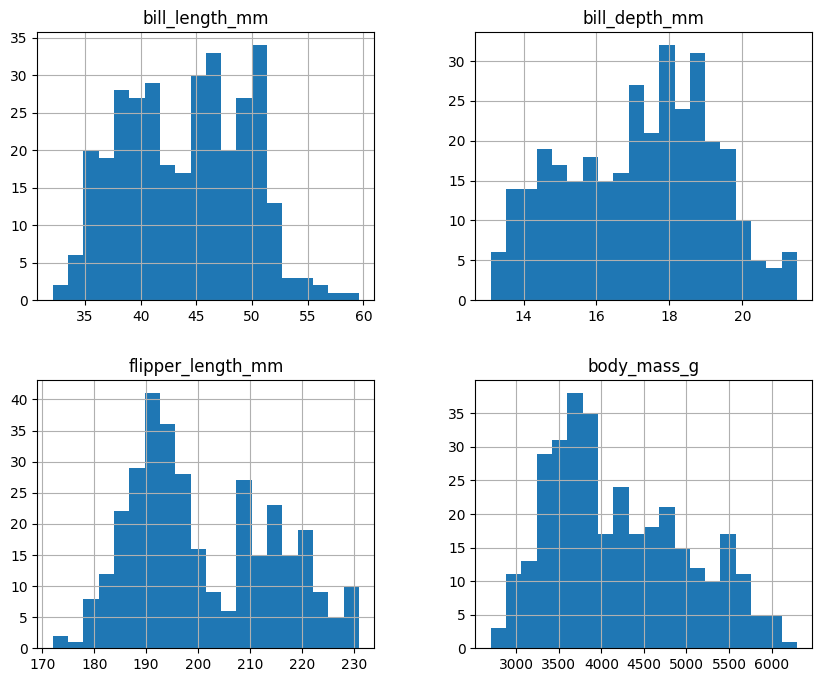

In [43]:
import matplotlib.pyplot as plt

# Histogram for numerical columns
df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].hist(figsize=(10, 8), bins=20)
plt.show()


In [19]:
# Print unique species
print(df_cleaned['species'].unique())


['Adelie', 'Gentoo', 'Chinstrap', NaN]
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']


In [20]:
# Group by species and sex, then count the number of individuals
species_sex_count = df_cleaned.groupby(['species', 'sex']).size().reset_index(name='count')

# Display the result
print(species_sex_count)


     species     sex  count
0     Adelie  female     73
1     Adelie    male     73
2  Chinstrap  female     34
3  Chinstrap    male     34
4     Gentoo  female     58
5     Gentoo    male     61


<ipython-input-20-093687009436>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_sex_count = df_cleaned.groupby(['species', 'sex']).size().reset_index(name='count')


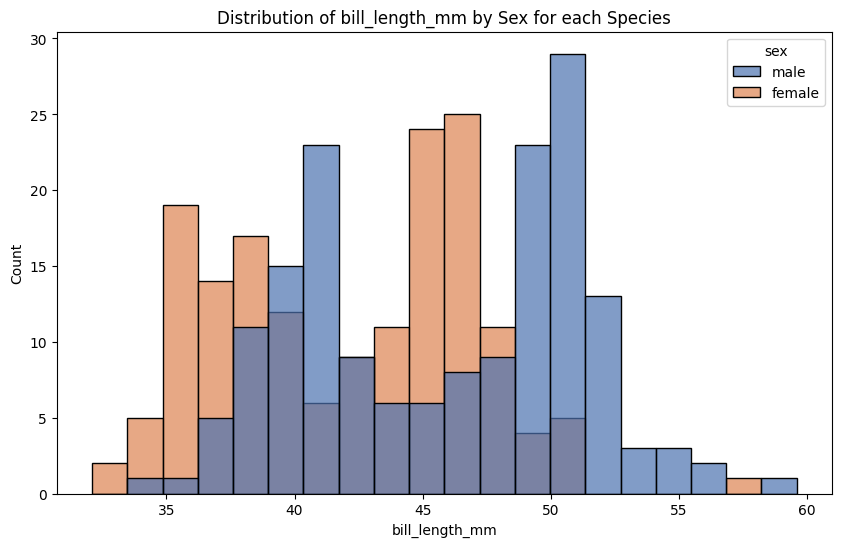

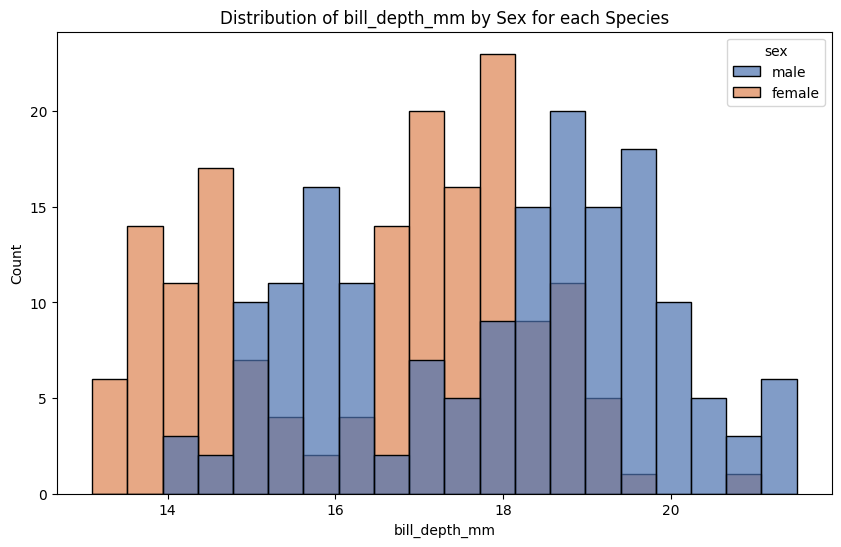

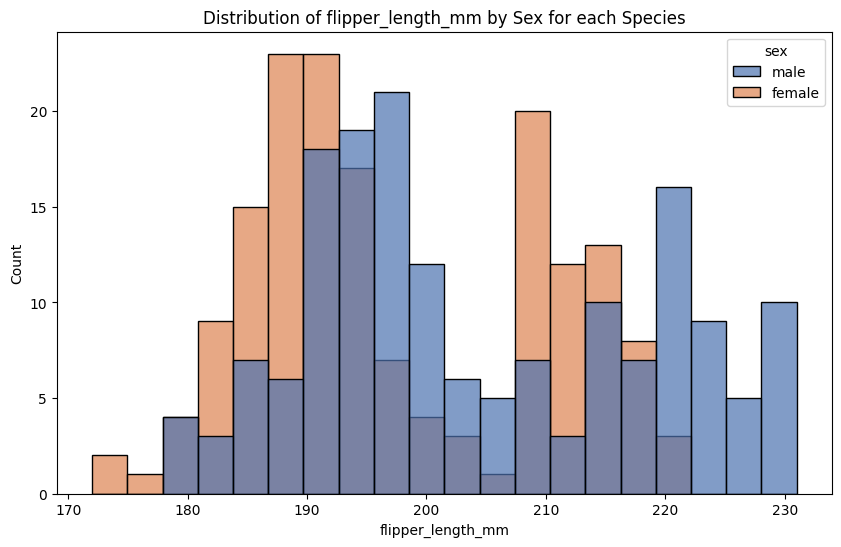

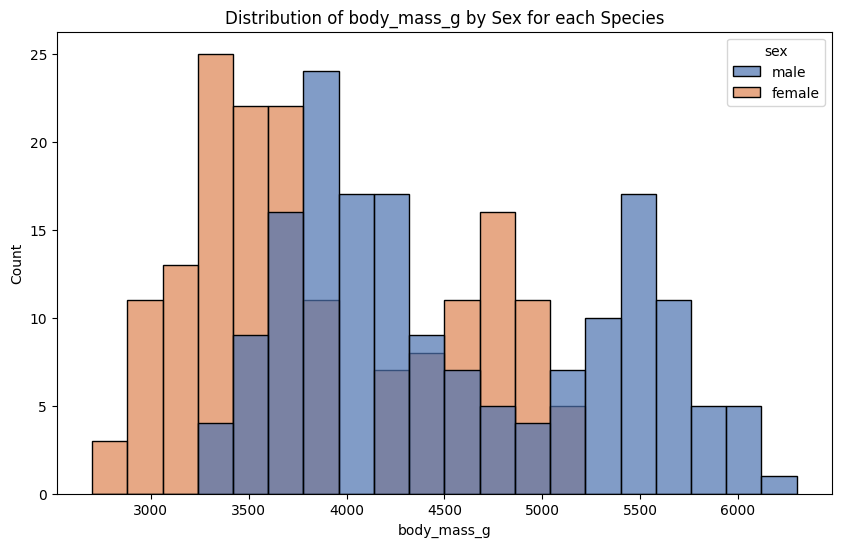

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create semi-transparent histograms for each numerical column by species and sex
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=column, hue='sex', multiple='layer',  # Use 'layer' to allow overlapping
                 palette='deep', bins=20, alpha=0.7)  # Adjusted alpha for transparency
    plt.title(f'Distribution of {column} by Sex for each Species')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()




In [37]:
# Display all available palettes
import seaborn as sns
print(sns.palettes.SEABORN_PALETTES)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

#Visualization Tasks

<ipython-input-46-cd6478934707>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='species', palette='deep')


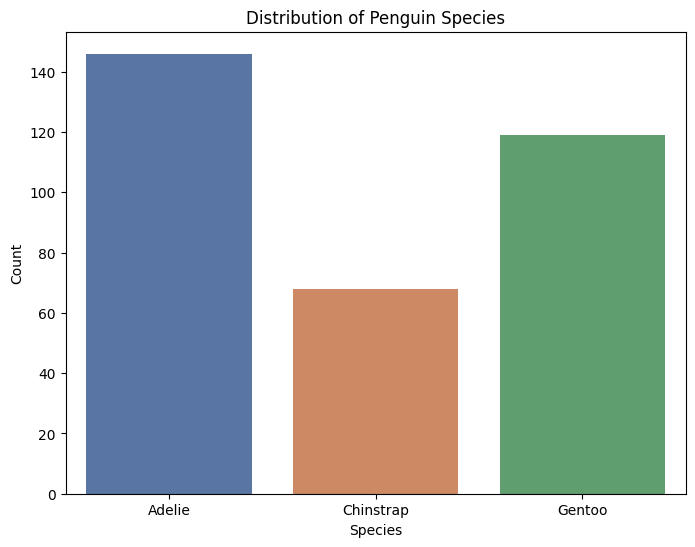

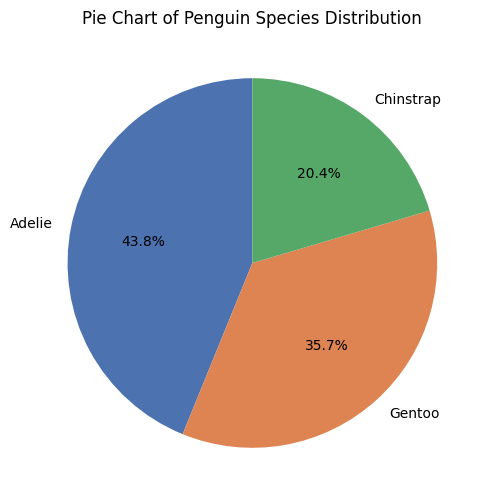

In [46]:
# Bar chart for species distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='species', palette='deep')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Get the count of each species
species_counts = df_cleaned['species'].value_counts()

# Pie chart for species distribution
plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))
plt.title('Pie Chart of Penguin Species Distribution')
plt.show()

**The majority of the penguins in the dataset belong to the Adelie species, followed by Gentoo and Chinstrap species.**

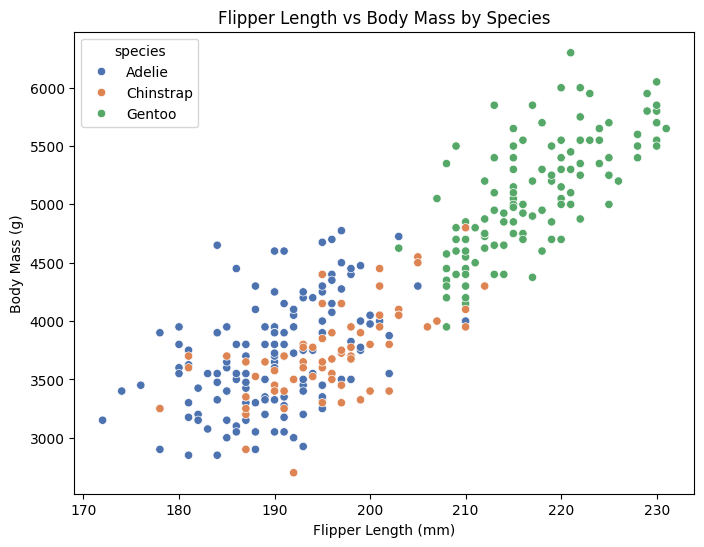

In [47]:
# Scatter plot for flipper length vs body mass, color-coded by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='flipper_length_mm', y='body_mass_g', hue='species', palette='deep')
plt.title('Flipper Length vs Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


**There’s a clear positive correlation between flipper length and body mass. Gentoo penguins have both the longest flippers and the highest body mass, while Adelie penguins have the shortest flippers and the lowest body mass.**

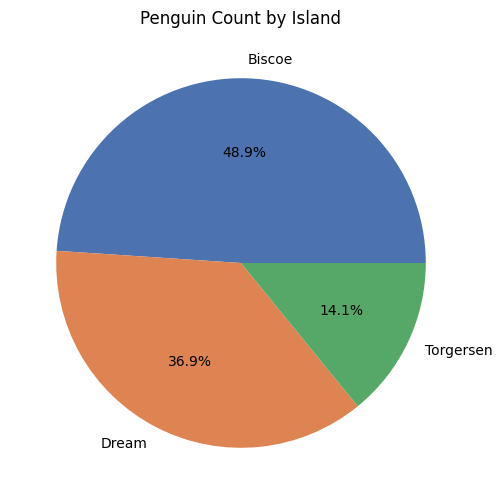

In [48]:
# Pie chart for island distribution
island_counts = df_cleaned['island'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', colors=sns.color_palette('deep'))
plt.title('Penguin Count by Island')
plt.show()


**Biscoe Island hosts the highest number of penguins in this dataset, followed by Dream Island and Torgersen Island**

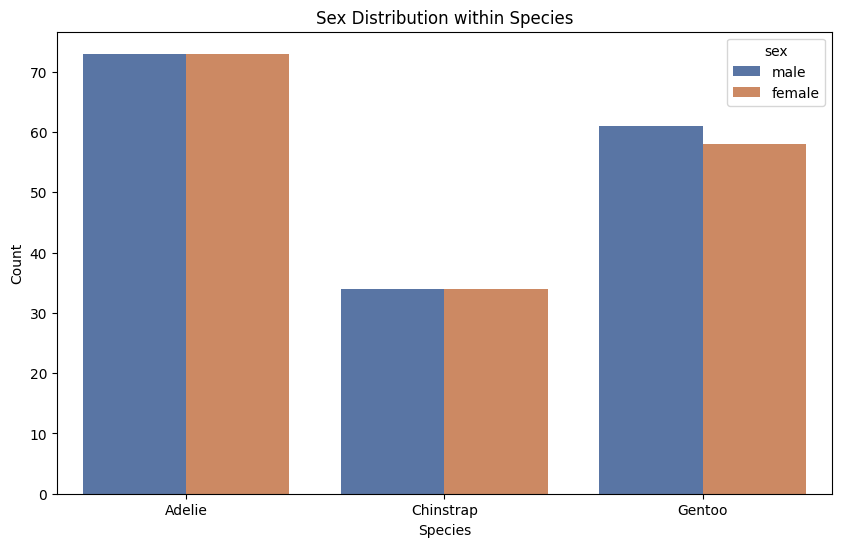

In [49]:
# Grouped bar chart for sex distribution within species
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='species', hue='sex', palette='deep')
plt.title('Sex Distribution within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


**The male-to-female ratio is relatively balanced across species, though there are slightly more female Adelie penguins compared to males**

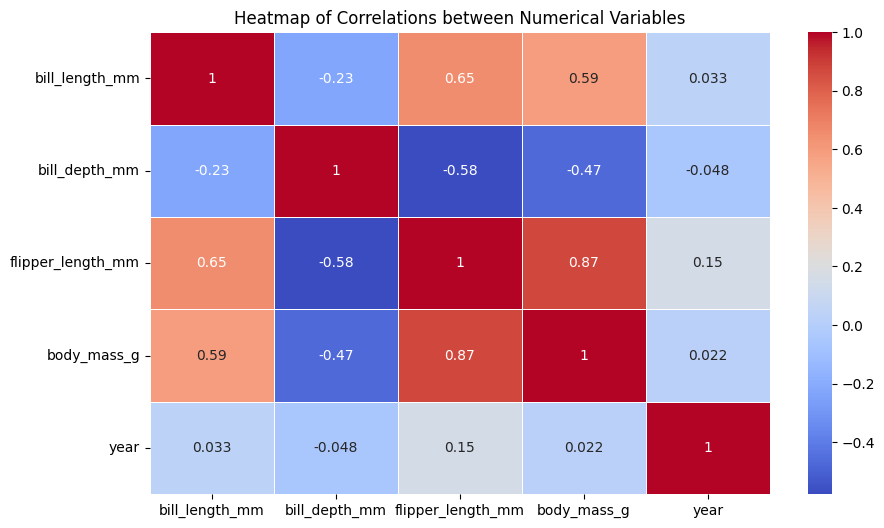

In [52]:
# Compute the correlation matrix for numerical columns only
corr = df_cleaned.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations between Numerical Variables')
plt.show()


**Flipper length and body mass are strongly correlated (0.87), which makes sense given that larger penguins tend to have longer flippers. Other variables, like bill length and bill depth, have a moderate positive correlation.**

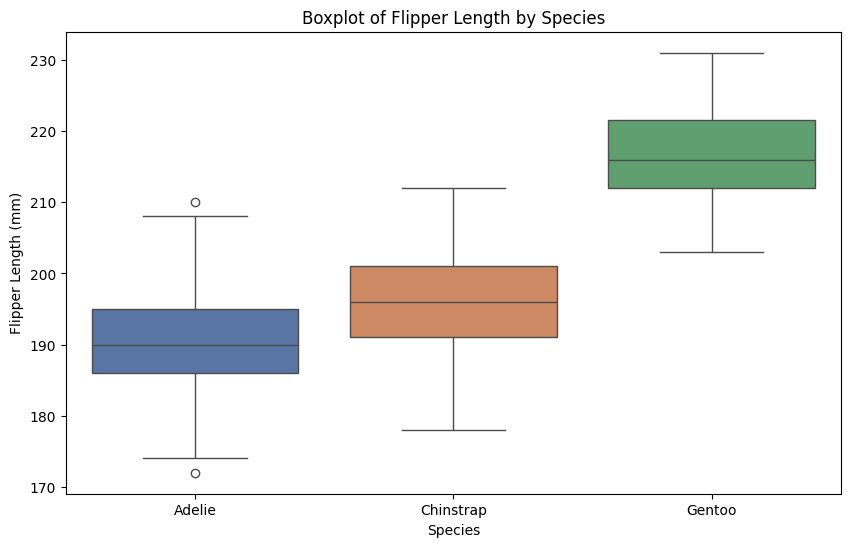

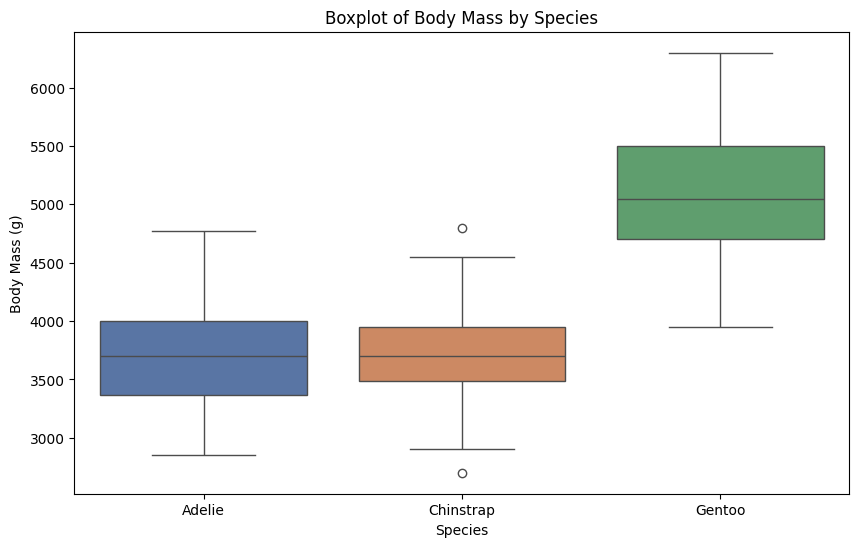

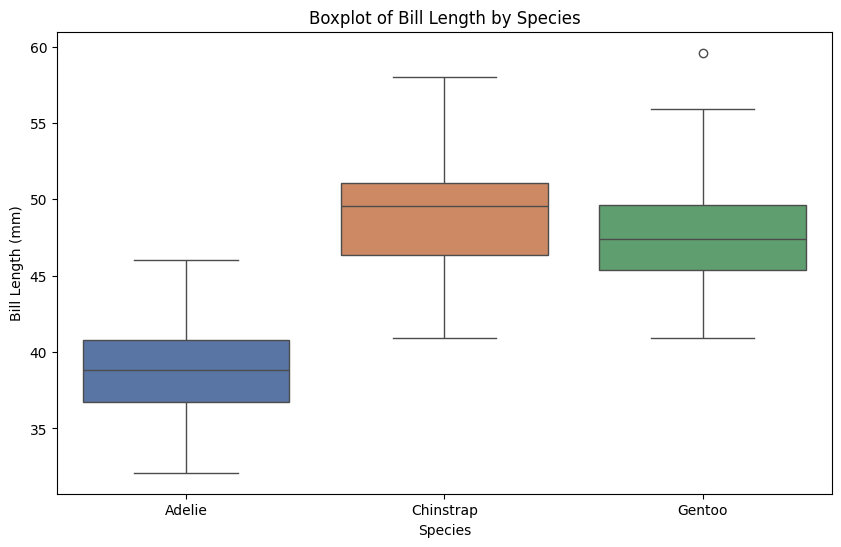

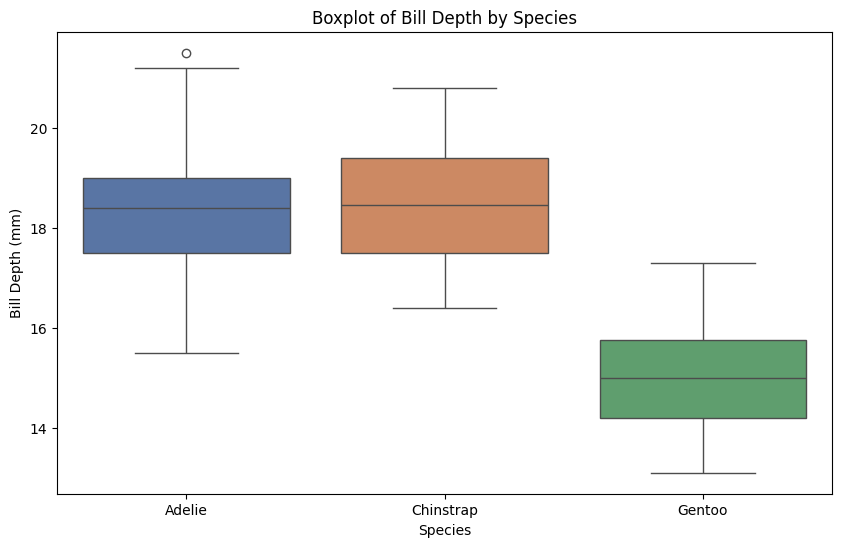

In [58]:
# Boxplot for Flipper Length by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='species', y='flipper_length_mm', hue='species', palette='deep', dodge=False)
plt.title('Boxplot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.legend([], [], frameon=False)  # Remove the legend for the 'hue' since it's redundant
plt.show()

# Boxplot for Body Mass by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='species', y='body_mass_g', hue='species', palette='deep', dodge=False)
plt.title('Boxplot of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

# Boxplot for Bill Length by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='species', y='bill_length_mm', hue='species', palette='deep', dodge=False)
plt.title('Boxplot of Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

# Boxplot for Bill Depth by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='species', y='bill_depth_mm', hue='species', palette='deep', dodge=False)
plt.title('Boxplot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()



<ipython-input-60-a6f8e1cd585c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_cleaned, x='species', y='flipper_length_mm', palette='deep')


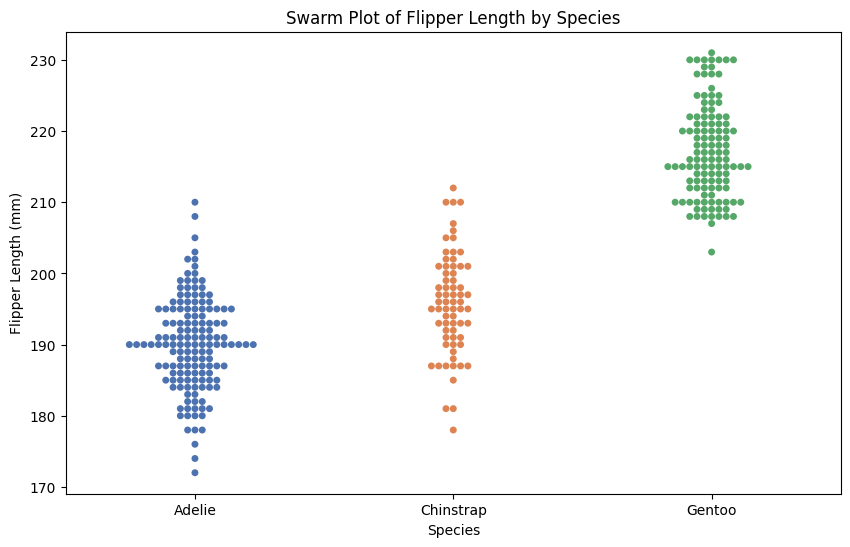

<ipython-input-60-a6f8e1cd585c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_cleaned, x='species', y='body_mass_g', palette='deep')


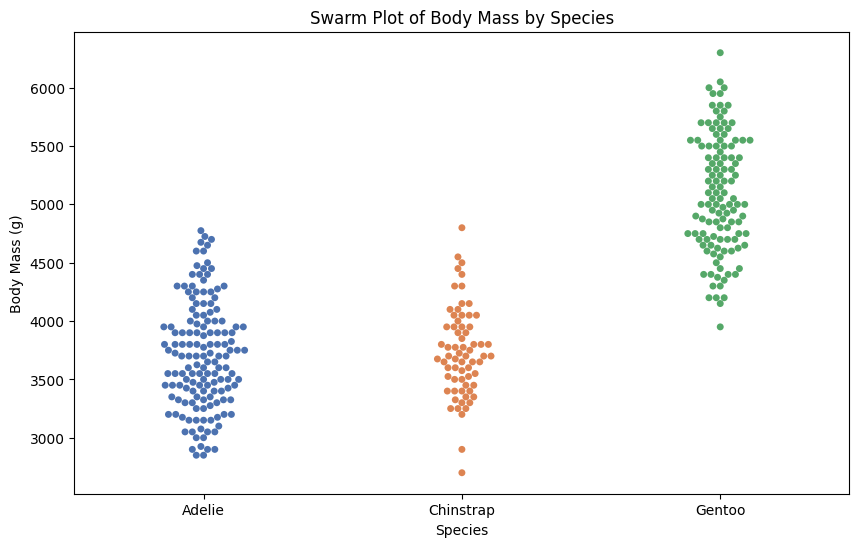

<ipython-input-60-a6f8e1cd585c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_cleaned, x='species', y='bill_length_mm', palette='deep')


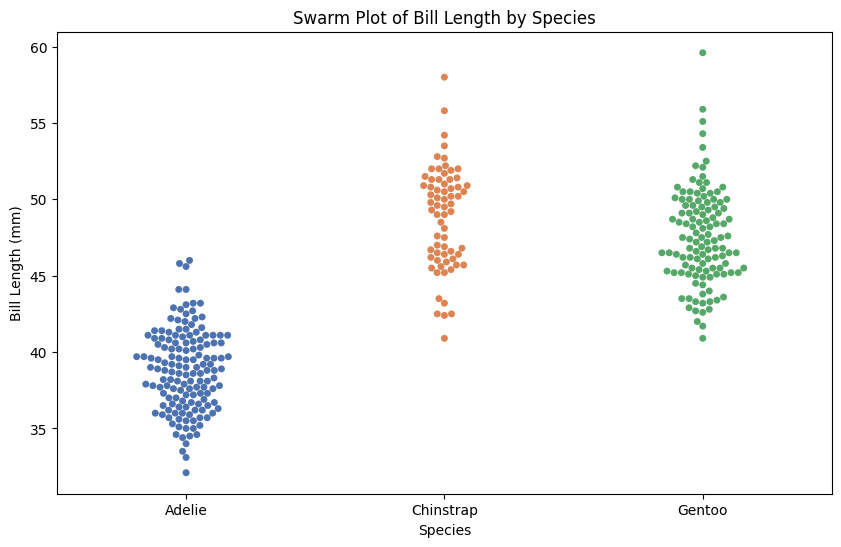

<ipython-input-60-a6f8e1cd585c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_cleaned, x='species', y='bill_depth_mm', palette='deep')


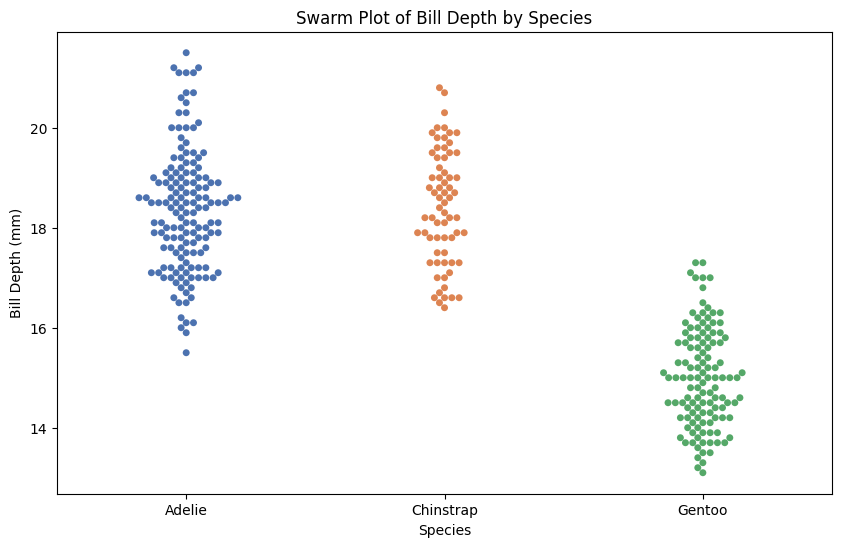

In [60]:
# Swarm Plot for Flipper Length by Species
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_cleaned, x='species', y='flipper_length_mm', palette='deep')
plt.title('Swarm Plot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

# Swarm Plot for Body Mass by Species
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_cleaned, x='species', y='body_mass_g', palette='deep')
plt.title('Swarm Plot of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

# Swarm Plot for Bill Length by Species
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_cleaned, x='species', y='bill_length_mm', palette='deep')
plt.title('Swarm Plot of Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
plt.show()

# Swarm Plot for Bill Depth by Species
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_cleaned, x='species', y='bill_depth_mm', palette='deep')
plt.title('Swarm Plot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

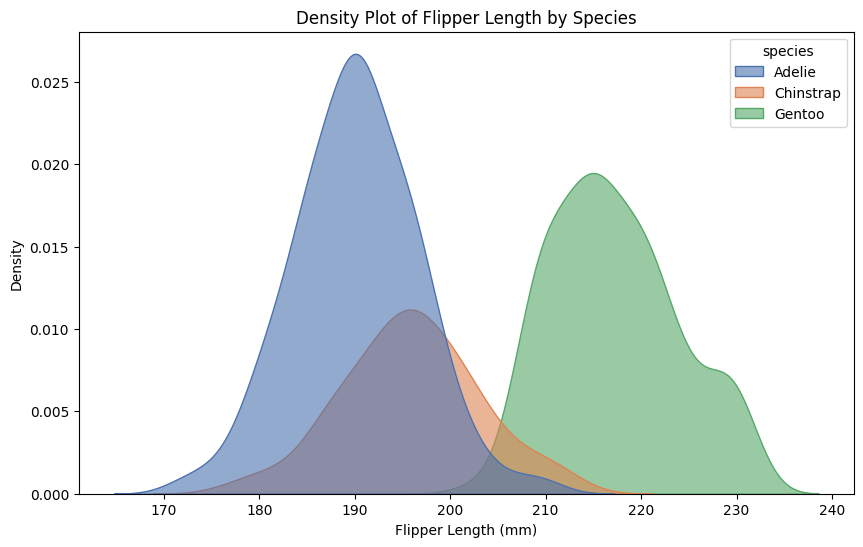

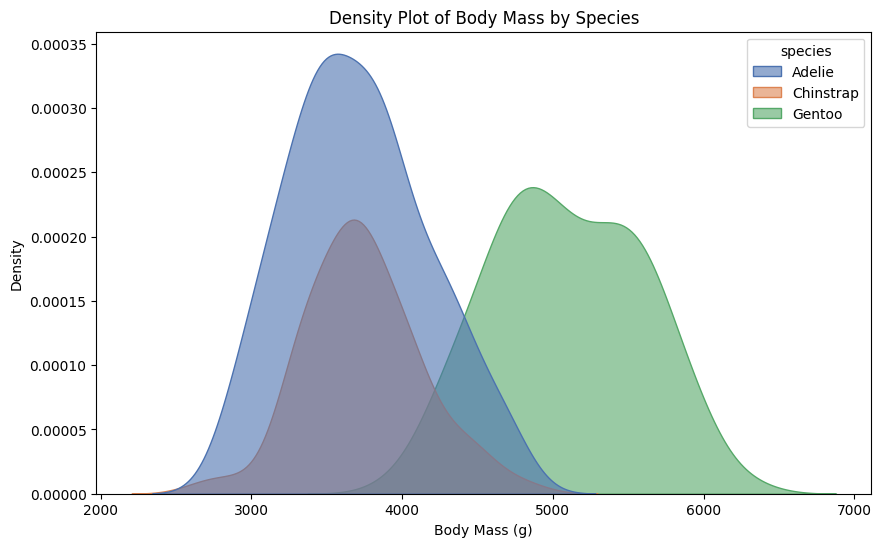

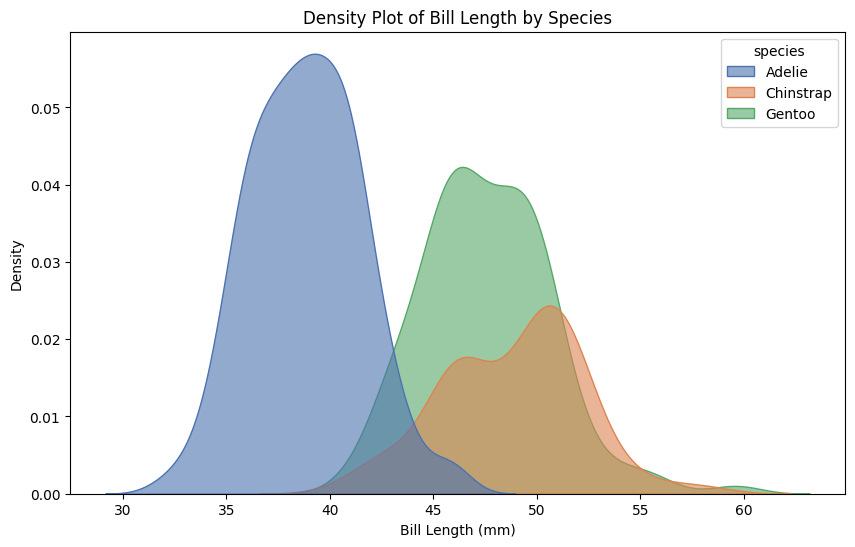

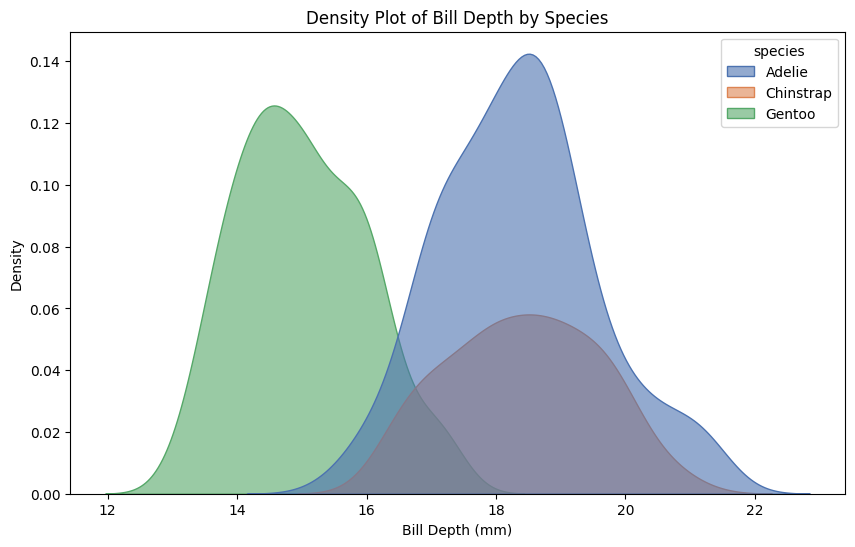

In [62]:
# Density Plot for Flipper Length by Species
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='flipper_length_mm', hue='species', fill=True, palette='deep', alpha=0.6)
plt.title('Density Plot of Flipper Length by Species')
plt.xlabel('Flipper Length (mm)')
plt.show()

# Density Plot for Body Mass by Species
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='body_mass_g', hue='species', fill=True, palette='deep', alpha=0.6)
plt.title('Density Plot of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.show()

# Density Plot for Bill Length by Species
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='bill_length_mm', hue='species', fill=True, palette='deep', alpha=0.6)
plt.title('Density Plot of Bill Length by Species')
plt.xlabel('Bill Length (mm)')
plt.show()

# Density Plot for Bill Depth by Species
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='bill_depth_mm', hue='species', fill=True, palette='deep', alpha=0.6)
plt.title('Density Plot of Bill Depth by Species')
plt.xlabel('Bill Depth (mm)')
plt.show()


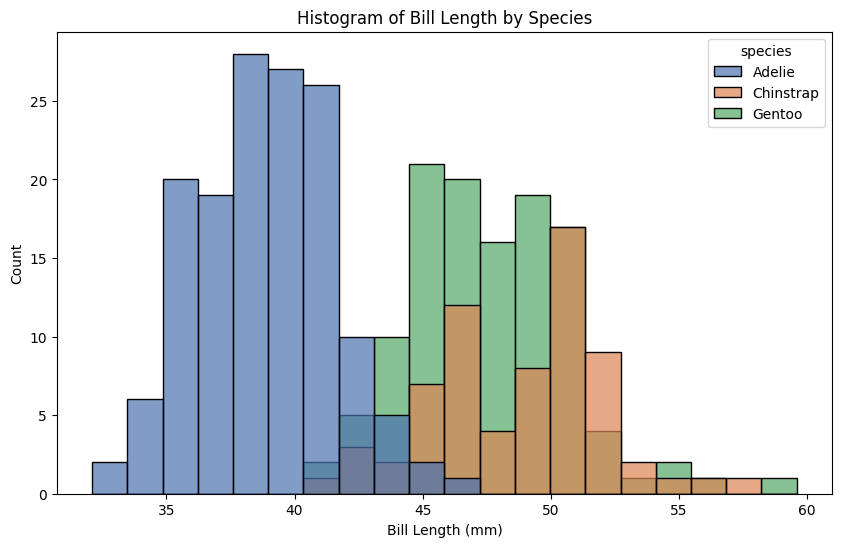

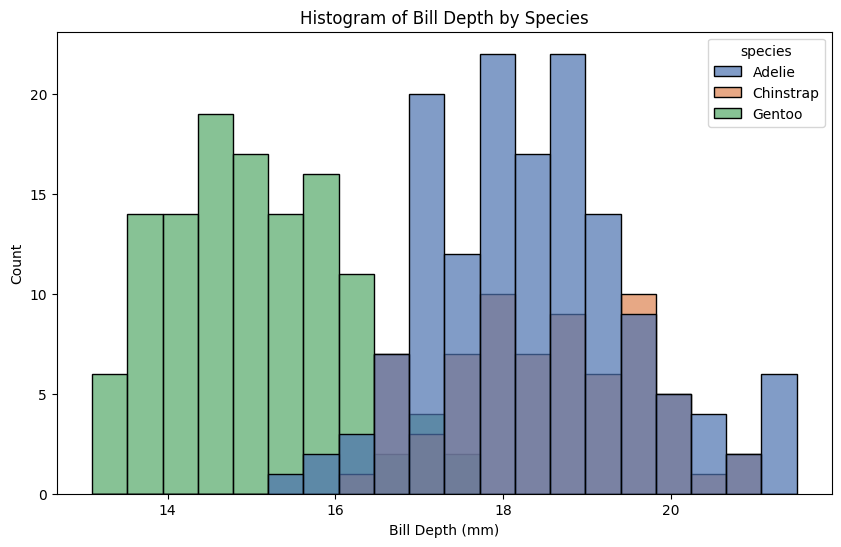

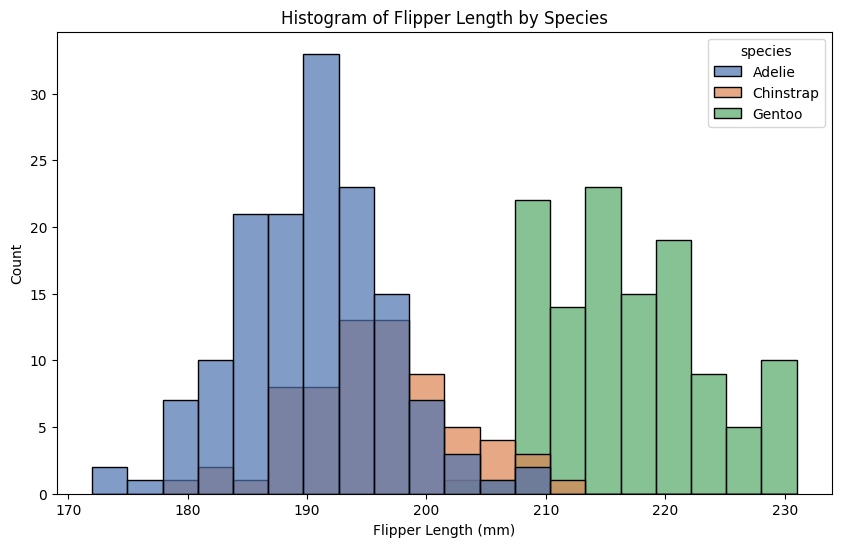

In [57]:
# Histograms for bill length, bill depth, and flipper length
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='bill_length_mm', hue='species', multiple='layer', palette='deep', bins=20, alpha=0.7)
plt.title('Histogram of Bill Length by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='bill_depth_mm', hue='species', multiple='layer', palette='deep', bins=20, alpha=0.7)
plt.title('Histogram of Bill Depth by Species')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='flipper_length_mm', hue='species', multiple='layer', palette='deep', bins=20, alpha=0.7)
plt.title('Histogram of Flipper Length by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Count')
plt.show()
